# Calculate `Asym` vs. `Emin` from `bhm_e`

Rewriting `calc_Asym_vs_emin_energies` for `bhm_e`.

P. Schuster  
July 18, 2018  

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

import sys
import os
import os.path
import scipy.io as sio

import time
import numpy as np
np.set_printoptions(threshold=np.nan) # print entire matrices
import pandas as pd
from tqdm import *

In [3]:
sys.path.append('../scripts/')

In [19]:
import bicorr as bicorr
import bicorr_math as bicorr_math
import bicorr_plot as bicorr_plot
import bicorr_e as bicorr_e
import bicorr_sums as bicorr_sums

In [5]:
%load_ext autoreload
%autoreload 2

# Load data

In [6]:
det_df = bicorr.load_det_df()

In [8]:
chList, fcList, detList, num_dets, num_det_pairs = bicorr.build_ch_lists()
dict_pair_to_index, dict_index_to_pair, dict_pair_to_angle = bicorr.build_dict_det_pair(det_df)

In [11]:
singles_hist_e_n, e_bin_edges, dict_det_to_index, dict_index_to_det = bicorr_e.load_singles_hist_both(filepath = '../analysis/Cf072115_to_Cf072215b/datap/',plot_flag=True, save_flag=True)

<Figure size 288x216 with 0 Axes>

In [12]:
bhm_e, e_bin_edges, note = bicorr_e.load_bhm_e('../analysis/Cf072115_to_Cf072215b/datap')

In [39]:
bhp_e = np.zeros((len(det_df),len(e_bin_edges)-1,len(e_bin_edges)-1))
for index in det_df.index.values: # index is same as in `bhm`
    bhp_e[index,:,:] = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=[index])[0]

In [40]:
emins = np.arange(0.5,5,.2)
emax = 12
print(emins)

angle_bin_edges = np.arange(8,190,10)
print(angle_bin_edges)

[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9
 4.1 4.3 4.5 4.7 4.9]
[  8  18  28  38  48  58  68  78  88  98 108 118 128 138 148 158 168 178
 188]


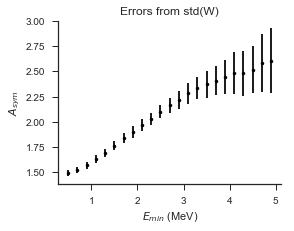

,emin,emax,emin_real,emax_real,Asym,Asym_err
0,0.5,12,12.0,0.500,1.492205,0.031472
1,0.7,12,12.0,0.675,1.524052,0.032641
2,0.9,12,12.0,0.875,1.571432,0.036405
3,1.1,12,12.0,1.075,1.630173,0.037786
4,1.3,12,12.0,1.275,1.693321,0.040823
5,1.5,12,12.0,1.475,1.763447,0.045395
6,1.7,12,12.0,1.675,1.836689,0.050492
7,1.9,12,12.0,1.875,1.899845,0.054757
8,2.1,12,12.0,2.075,1.967692,0.060244
9,2.3,12,12.0,2.275,2.028775,0.062086


In [43]:
bicorr_sums.calc_Asym_vs_emin_energies(det_df, dict_index_to_det, singles_hist_e_n, e_bin_edges, bhp_e, e_bin_edges, emins, emax, angle_bin_edges, save_flag=False)